### Notebook for running SCOT on scGEM Data
**Note:** This version of the notebook runs a new setting for SCOT, where we use correlation as a metric for building kNN graphs and use connectivity information from this graph in intra-domain similarity matrices fed into the optimal transport algorithm.  

SCOT software has been updated on 20 September 2020. It now outputs error statements for convergence issues at low epsilon values. When it runs into numerical instabilities in convergence, it outputs None, None instead of X_new, y_new. If you run into such an error, please try using a larger epsilon value for the entropic regularization.  

If you have any questions, e-mail: ritambhara@brown.edu, pinar_demetci@brown.edu, rebecca_santorella@brown.edu  

In [1]:
import src.utils as ut
import src.evals as evals
from src.scot import *

In [23]:
X=np.genfromtxt("data/scGEM_methylation.csv", delimiter=",")
y=np.genfromtxt("data/scGEM_expression.csv", delimiter=",")
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)

Dimensions of input datasets are:  X=  (177, 27)  y=  (177, 34)


In [28]:
X=ut.zscore_standardize(X)
y=ut.zscore_standardize(y)
X_new,y_new= scot(X, y, k=35, e=5e-3, mode="connectivity", metric="correlation")

It.  |Err         
-------------------
    0|4.652888e-03|
   10|2.882694e-04|
   20|4.027273e-05|
   30|4.547527e-06|
   40|5.119105e-07|
   50|5.899915e-08|
   60|7.007926e-09|
   70|8.772851e-10|


### Evaluating Alignment

In [29]:
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment is: ", np.mean(fracs))

Average FOSCTTM score for this alignment is:  0.22093284540318442


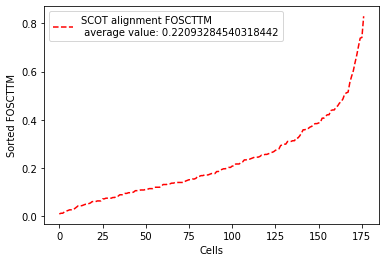

In [30]:
import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs))
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

### Visualizing Alignment

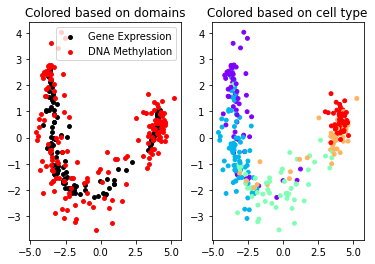

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca=Xy_pca[0: 177,]
y_pca=Xy_pca[177:,]

### Read in cell type information:
Xlabels=np.genfromtxt("data/scGEM_typeExpression.txt")
ylabels=np.genfromtxt("data/scGEM_typeMethylation.txt")

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Gene Expression")
ax1.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="DNA Methylation")
ax1.legend()
ax1.set_title("Colored based on domains")

ax2.scatter(X_pca[:,0], X_pca[:,1], cmap="rainbow", c=Xlabels, s=15)
ax2.scatter(y_pca[:,0], y_pca[:,1], cmap="rainbow", c=ylabels, s=15)
ax2.set_title("Colored based on cell type")
plt.show()
